In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    Flatten,
    Input,
    Dropout,
    MaxPooling2D,
    SimpleRNN,
    MaxPool2D,
)
from tensorflow.keras import Model
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


In [74]:
path = Path('data')
X_train = np.load(path/'X_train.npy')
y_train = np.load(path/'y_train.npy')
X_test = np.load(path/'X_test.npy')
y_test = np.load(path/'y_test.npy')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((47, 16, 16, 1), (47, 5), (12, 16, 16, 1), (12, 5))

In [75]:
y_test[0]

array([1.        , 0.58984375, 0.01953125, 0.234375  , 0.46875   ])

In [76]:
EPOCHS = 1000
BATCH_SIZE = 16
IMG_SIZE = X_train.shape[1]
X_test.shape

(12, 16, 16, 1)

In [77]:
def build_model():
    # Define model layers.
    input_layer = Input(name= 'input' ,shape=(IMG_SIZE, IMG_SIZE, 1))
    first_dense = Conv2D(32, (3, 3), activation='relu', name='conv1')(input_layer)
    flatten_layer = Flatten(name= 'flatten' )(first_dense)
    second_dense = Dense(units=8,activation='relu', name='relu1')(flatten_layer)
    y1_output = Dense(units=1, name='classification')(second_dense)
    y2_output = Dense(units=4,name='regression')(second_dense)
    model = Model(inputs=input_layer,outputs=[y1_output, y2_output])
    return model



In [78]:
def total_loss(y_true, y_pred):
    y1_true, y2_true = y_true
    y1_pred, y2_pred = y_pred
    loss_class = tf.keras.losses.binary_crossentropy(y1_true, y1_pred)
    loss_reg = tf.keras.losses.mean_squared_error(y2_true, y2_pred)
    return loss_class + loss_reg*2

In [81]:
model = build_model()
optimizer = Adam(learning_rate=0.001)
#model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.compile(optimizer=optimizer, loss=total_loss, metrics=['mae'])
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 16, 16, 1)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 14, 14, 32)   320         ['input[0][0]']                  
                                                                                                  
 flatten (Flatten)              (None, 6272)         0           ['conv1[0][0]']                  
                                                                                                  
 relu1 (Dense)                  (None, 8)            50184       ['flatten[0][0]']                
                                                                                            

In [82]:
#history = model.fit(X_train, y_train[:,1:], epochs=EPOCHS, batch_size=BATCH_SIZE)
history = model.fit(X_train, {'classification': y_train[:,0], 'regression': y_train[:,1:]}, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/1000


OperatorNotAllowedInGraphError: in user code:

    File "c:\Users\skibi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\skibi\AppData\Local\Temp\ipykernel_18376\1979475540.py", line 2, in total_loss  *
        y1_true, y2_true = y_true

    OperatorNotAllowedInGraphError: Iterating over a symbolic `tf.Tensor` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.


<AxesSubplot: >

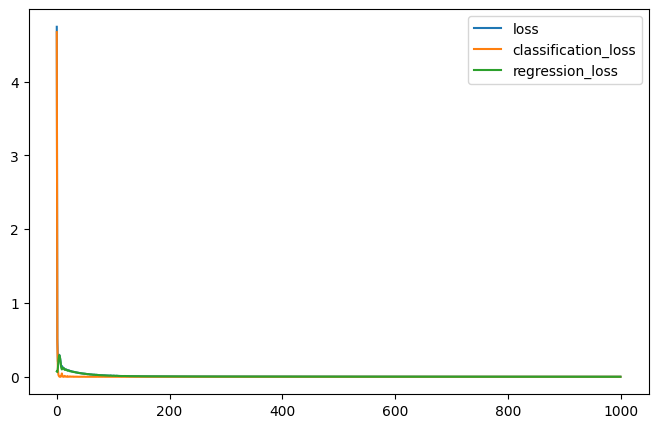

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))


In [ ]:
model.predict(X_test[:1])[1][0]

1/1 [==============================] - 0s 26ms/step


array([0.46251035, 0.0875791 , 0.23227651, 0.45235413], dtype=float32)

1/1 [==============================] - 0s 19ms/step
[0.46251035 0.0875791  0.23227651 0.45235413]
1/1 [==============================] - 0s 23ms/step
[-8.5219741e-05  6.0707331e-05  6.1854720e-05  1.8328428e-05]
1/1 [==============================] - 0s 20ms/step
[0.43575004 0.41156515 0.23610412 0.48092833]
1/1 [==============================] - 0s 24ms/step
[0.40306434 0.07530847 0.23175906 0.4488592 ]
1/1 [==============================] - 0s 23ms/step
[0.15646043 0.23050699 0.23215228 0.45321772]
1/1 [==============================] - 0s 21ms/step
[-8.5219741e-05  6.0707331e-05  6.1854720e-05  1.8328428e-05]


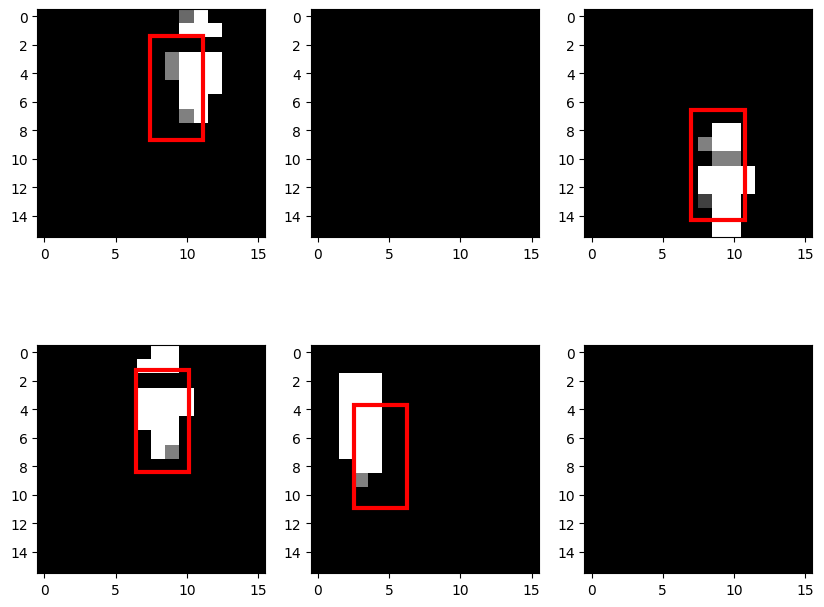

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
images = np.random.choice(X_test.shape[0], 6)

for i in range(2):
    for j in range(3):
        index = np.random.randint(0, X_test.shape[0])
        rect = model.predict(X_test[index:index+1])[1][0]
        print(rect)
        x, y, w, h = rect
        ax[i, j].add_patch(
            plt.Rectangle(
                (x * IMG_SIZE, y * IMG_SIZE),
                w * IMG_SIZE,
                h * IMG_SIZE,
                fill=False,
                edgecolor="red",
                lw=3,
            )
            )
        # draw true rect 
        
        ax[i, j].imshow(X_test[index], cmap="gray")
plt.show()
